In [56]:
%load_ext lab_black

import numpy as np
from math import sqrt
import pandas as pd
import datetime
import operator
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
from matplotlib import colors as mcolors
import csv
from datetime import timedelta
import requests
from plotly.subplots import make_subplots

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [57]:
map_access_token = "pk.eyJ1IjoiZGFuYWFiaGk3MTE5IiwiYSI6ImNrOGw5cjA1YzAwaG8zbm44d2dqMmF2cHkifQ.OttP_QaQp-BDSzQY5qBf1w"
px.set_mapbox_access_token(
    "pk.eyJ1IjoiZGFuYWFiaGk3MTE5IiwiYSI6ImNrOGw5cjA1YzAwaG8zbm44d2dqMmF2cHkifQ.OttP_QaQp-BDSzQY5qBf1w"
)
pyo.init_notebook_mode(connected=True)

In [58]:
%matplotlib inline


class style:
    BOLD = "\033[1m"
    END = "\033[0m"

In [59]:
confirmUrl = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
deathUrl = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"
recoverUrl = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv"


# get latest data

ccs = requests.get(confirmUrl, allow_redirects=True)
open("time_series_covid_19_confirmed.csv", "wb").write(ccs.content)

dcs = requests.get(deathUrl, allow_redirects=True)
open("time_series_covid_19_deaths.csv", "wb").write(dcs.content)

rcs = requests.get(recoverUrl, allow_redirects=True)
open("time_series_covid_19_recovered.csv", "wb").write(rcs.content)

# save to CSV

65676

In [118]:
confirmedcountry = pd.read_csv("./time_series_covid_19_confirmed.csv")
deathscountry = pd.read_csv("./time_series_covid_19_deaths.csv")
recoveredcountry = pd.read_csv("./time_series_covid_19_recovered.csv")
indiadata = pd.read_csv(
    "./covid_19_india.csv",
    header=0,
    names=[
        "SN",
        "States",
        "Active",
        "Confirmed",
        "Deaths",
        "Recovered",
        "Date",
        "Lat",
        "Lon",
    ],
)

In [119]:
# funcation to get all conuntry data


def getAllCountryConfirmedData():
    return confirmedcountry


def getAllCountryDeathsData():
    return deathscountry


def getAllCountryRecoveredData():
    return recoveredcountry


def getIndiaData():
    return indiadata

In [62]:
# funcation to get last data of each table
def getLastDateOfConfirmed():
    cols = confirmedcountry.keys()
    return cols[cols.size - 1]


def getLastDateOfDeaths():
    cols = deathscountry.keys()
    return cols[cols.size - 1]


def getLastDateOfRecoverd():
    cols = recoveredcountry.keys()
    return cols[cols.size - 1]


# funcatoin To get date range of table
def getDateRange(data):
    datescols = data.columns
    return data.loc[:, datescols[4] : datescols[-1]]


def get_n_melt_data(data, case_type):
    df = data
    melted_df = df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"])
    melted_df.rename(columns={"variable": "Date", "value": case_type}, inplace=True)
    return melted_df


def merge_data(confirmed_df, recovered_df, deaths_df):
    new_df = confirmed_df.join(recovered_df["Recovered"]).join(deaths_df["Deaths"])
    return new_df

In [63]:
# get sort data by Country/Region
def sortdatabyCountryRegion(data):
    return data.groupby("Country/Region").sum().sort_values(by="Country/Region")

In [64]:
# get top 10 most cases country


def getTopConfirmedCaseCountry():
    return confirmedcountry.sort_values(
        by=getLastDateOfConfirmed(), ascending=False
    ).head(10)


def getTopDeathCaseCountry():
    return deathscountry.sort_values(by=getLastDateOfDeaths(), ascending=False).head(10)


def getTopRecoverCaseCountry():
    return recoveredcountry.sort_values(
        by=getLastDateOfRecoverd(), ascending=False
    ).head(10)

In [65]:
def getCountryName(data):
    return data.groupby("Country/Region").sum()

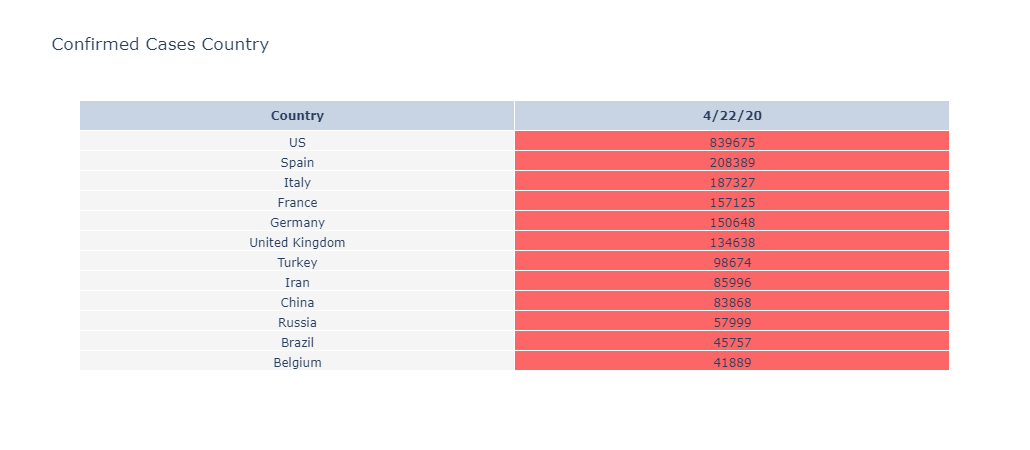

In [66]:
# Showing the table of Confirmed Table

data = (
    getAllCountryConfirmedData()
    .groupby("Country/Region")[getLastDateOfConfirmed()]
    .sum()
    .sort_values(ascending=False)
)

fig = go.Figure(
    data=[
        go.Table(
            header=dict(
                values=["<b>Country</b>", "<b>" + getLastDateOfConfirmed() + "</b>"]
            ),
            cells=dict(
                values=[data.index, data.values],
                fill=dict(
                    color=[
                        "rgb(245, 245, 245)",  # unique color for the first column
                        [
                            "rgba(0, 250, 0, 0.6)"
                            if val <= 1000
                            else "rgba(250, 0, 0, 0.6)"
                            for val in data.values
                        ],
                    ]
                ),
            ),
        )
    ]
)
fig.update_layout(title="Confirmed Cases Country")
fig.show()

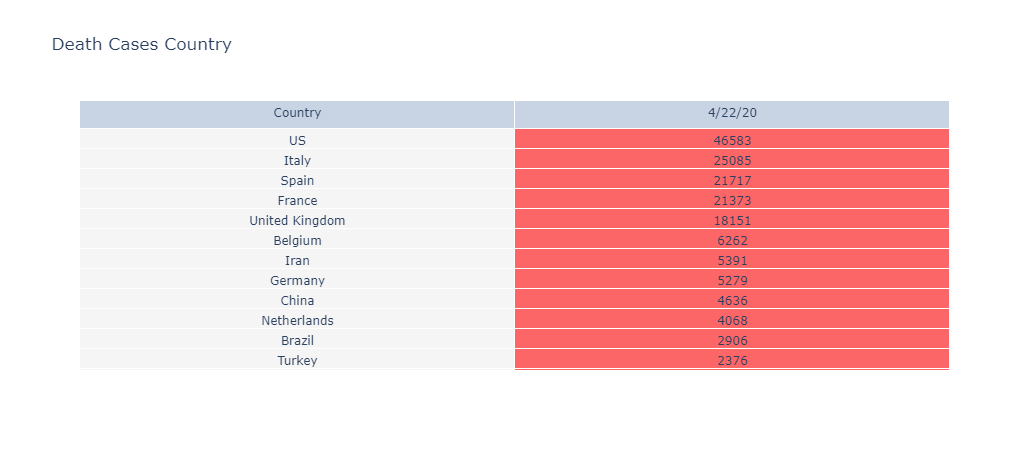

In [67]:
# Showing the table of Death Table

data = (
    getAllCountryDeathsData()
    .groupby("Country/Region")[getLastDateOfConfirmed()]
    .sum()
    .sort_values(ascending=False)
)

fig = go.Figure(
    data=[
        go.Table(
            header=dict(values=["Country", getLastDateOfDeaths()]),
            cells=dict(
                values=[data.index, data.values],
                fill=dict(
                    color=[
                        "rgb(245, 245, 245)",  # unique color for the first column
                        [
                            "rgba(0, 250, 0, 0.6)"
                            if val <= 1000
                            else "rgba(250, 0, 0, 0.6)"
                            for val in data.values
                        ],
                    ]
                ),
            ),
        )
    ]
)
fig.update_layout(title="Death Cases Country")
fig.show()

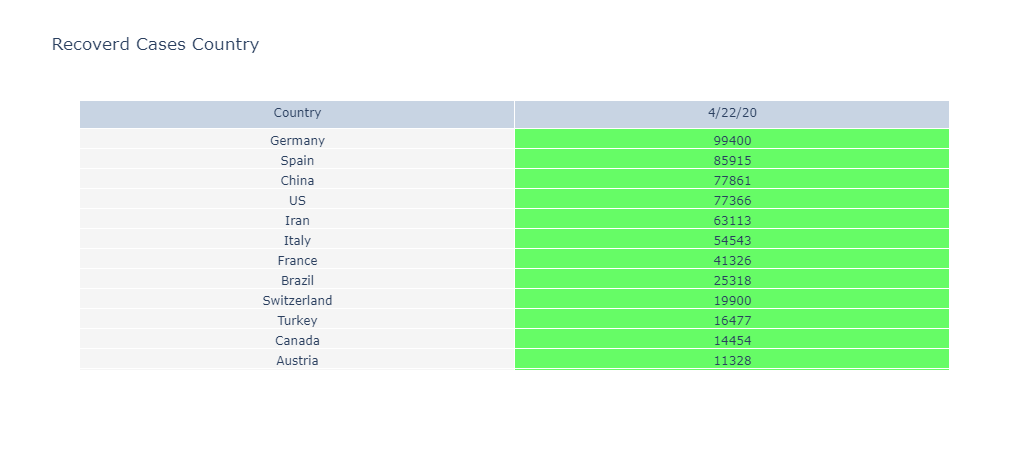

In [68]:
# Showing the table of Recovered Table

data = (
    getAllCountryRecoveredData()
    .groupby("Country/Region")[getLastDateOfRecoverd()]
    .sum()
    .sort_values(ascending=False)
)

fig = go.Figure(
    data=[
        go.Table(
            header=dict(values=["Country", getLastDateOfRecoverd()]),
            cells=dict(
                values=[data.index, data.values],
                fill=dict(
                    color=[
                        "rgb(245, 245, 245)",  # unique color for the first column
                        [
                            "rgba(0, 250, 0, 0.6)"
                            if val >= 1000
                            else "rgba(250, 0, 0, 0.6)"
                            for val in data.values
                        ],
                    ]
                ),
            ),
        )
    ]
)
fig.update_layout(title="Recoverd Cases Country")
fig.show()

In [69]:
topConfirmedCasesCountry = getTopConfirmedCaseCountry()
topDeathCasesCountry = getTopDeathCaseCountry()
topRecoverCasesCountry = getTopRecoverCaseCountry()

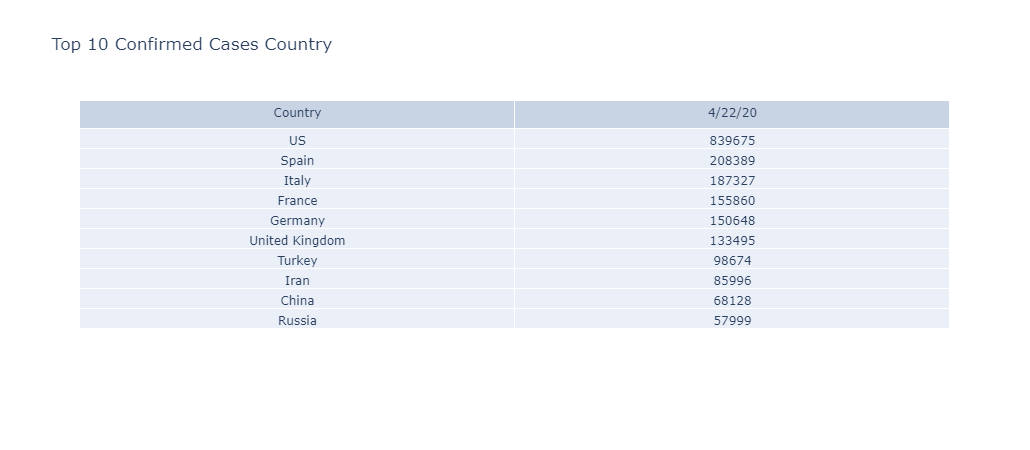

In [70]:
# Showing top 10 Confirmed Cases Country In Tabular Format


fig = go.Figure(
    data=[
        go.Table(
            header=dict(values=["Country", getLastDateOfConfirmed()]),
            cells=dict(
                values=[
                    topConfirmedCasesCountry["Country/Region"],
                    topConfirmedCasesCountry[getLastDateOfConfirmed()],
                ]
            ),
        )
    ]
)
fig.update_layout(title="Top 10 Confirmed Cases Country")
fig.show()

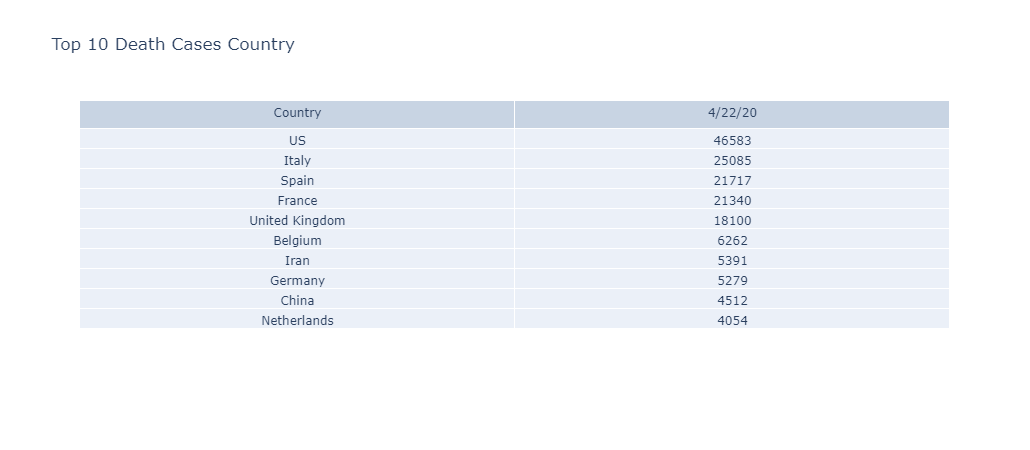

In [71]:
# Showing top 10 Death Cases Country In Tabular Format


fig = go.Figure(
    data=[
        go.Table(
            header=dict(values=["Country", getLastDateOfDeaths()]),
            cells=dict(
                values=[
                    topDeathCasesCountry["Country/Region"],
                    topDeathCasesCountry[getLastDateOfDeaths()],
                ]
            ),
        )
    ]
)
fig.update_layout(title="Top 10 Death Cases Country")
fig.show()

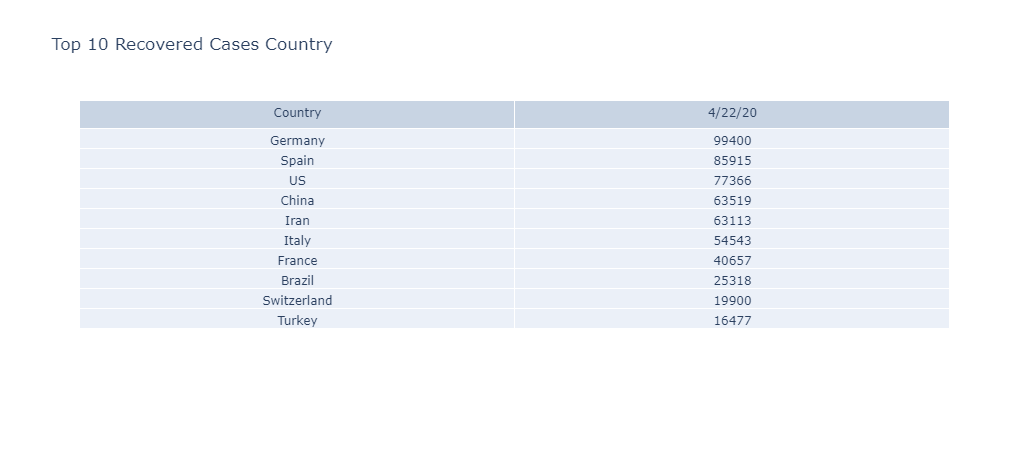

In [72]:
# Showing top 10 Recover Cases Country In Tabular Format
# print(style.BOLD + "\nTop 10 Recover Cases Country\n" + style.END)
# print(topRecoverCasesCountry[['Country/Region',getLastDateOfRecoverd()]].to_string(index=False))


fig = go.Figure(
    data=[
        go.Table(
            header=dict(values=["Country", getLastDateOfRecoverd()]),
            cells=dict(
                values=[
                    topRecoverCasesCountry["Country/Region"],
                    topRecoverCasesCountry[getLastDateOfRecoverd()],
                ],
            ),
        )
    ]
)
fig.update_layout(title="Top 10 Recovered Cases Country")
fig.show()

In [73]:
# get date range of each table

confirmdateRange = getDateRange(confirmedcountry)
recoverdateRange = getDateRange(recoveredcountry)
deathdateRange = getDateRange(deathscountry)

# get data of each from funcation

confirmedCountryData = getAllCountryConfirmedData()
deathsCountryData = getAllCountryDeathsData()
recoveredCountryData = getAllCountryRecoveredData()

In [74]:
# For Visualization We Need Latest Data

latest_confirmed = confirmedCountryData[getLastDateOfConfirmed()]
latest_deaths = deathscountry[getLastDateOfDeaths()]
latest_recoveries = recoveredcountry[getLastDateOfRecoverd()]

In [75]:
unique_confirmed_countries = list(confirmedCountryData["Country/Region"].unique())
unique_deaths_countries = list(deathsCountryData["Country/Region"].unique())
unique_recoveries_countries = list(recoveredCountryData["Country/Region"].unique())

In [76]:
# getting the uniques confirmed cases

confirmed_country_cases = []
no_cases = []

for i in unique_confirmed_countries:
    cases = latest_confirmed[confirmedCountryData["Country/Region"] == i].sum()

    if cases > 0:
        confirmed_country_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_confirmed_countries.remove(i)

unique_confirmed_countries = [
    k
    for k, v in sorted(
        zip(unique_confirmed_countries, confirmed_country_cases),
        key=operator.itemgetter(1),
        reverse=False,
    )
]
for i in range(len(unique_confirmed_countries)):
    confirmed_country_cases[i] = latest_confirmed[
        confirmedCountryData["Country/Region"] == unique_confirmed_countries[i]
    ].sum()

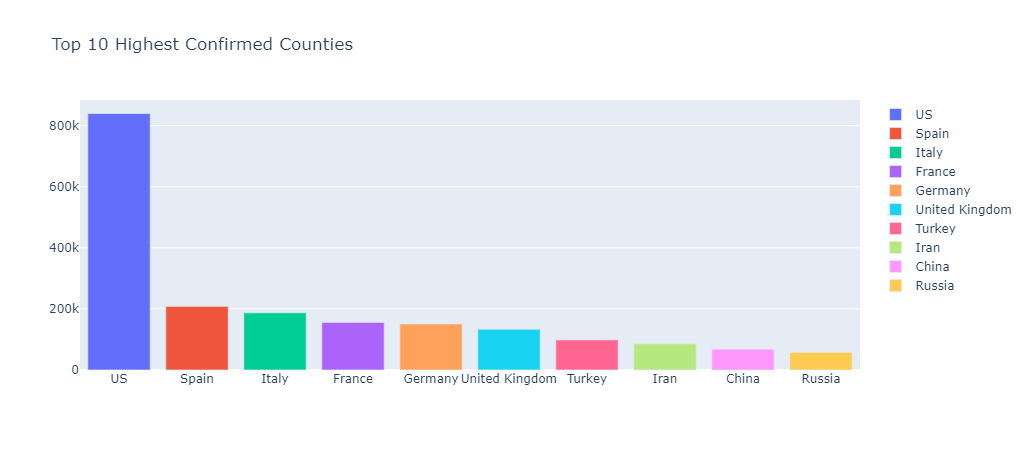

In [77]:
# printing the uniques confirmed contries

# print(style.BOLD + "\nUnique Confirmed Counties\n" + style.END)

fig = go.Figure()

for i in range(len(topConfirmedCasesCountry)):
    fig.add_traces(
        go.Bar(
            x=[topConfirmedCasesCountry["Country/Region"].iloc[i]],
            y=[topConfirmedCasesCountry[getLastDateOfConfirmed()].iloc[i]],
            name=topConfirmedCasesCountry["Country/Region"].iloc[i],
        )
    )

fig.update_layout(title="Top 10 Highest Confirmed Counties")
fig.show()

In [78]:
# getting the uniques death cases

death_country_cases = []
no_cases = []

for i in unique_deaths_countries:
    cases = latest_deaths[deathsCountryData["Country/Region"] == i].sum()

    if cases > 0:
        death_country_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_deaths_countries.remove(i)

unique_deaths_countries = [
    k
    for k, v in sorted(
        zip(unique_deaths_countries, death_country_cases),
        key=operator.itemgetter(1),
        reverse=False,
    )
]
for i in range(len(unique_deaths_countries)):
    death_country_cases[i] = latest_deaths[
        deathsCountryData["Country/Region"] == unique_deaths_countries[i]
    ].sum()

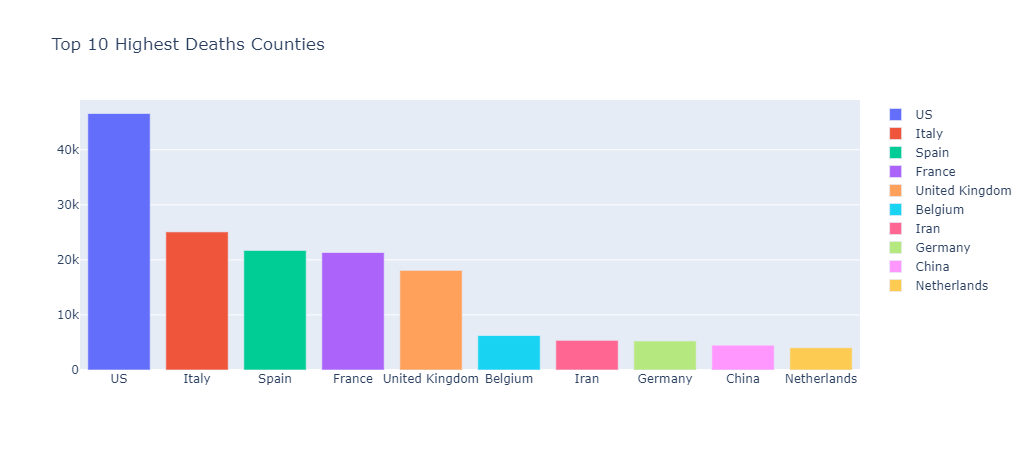

In [79]:
# printing the uniques death contries

fig = go.Figure()

for i in range(len(topDeathCasesCountry)):
    fig.add_traces(
        go.Bar(
            x=[topDeathCasesCountry["Country/Region"].iloc[i]],
            y=[topDeathCasesCountry[getLastDateOfDeaths()].iloc[i]],
            name=topDeathCasesCountry["Country/Region"].iloc[i],
        )
    )

fig.update_layout(title="Top 10 Highest Deaths Counties")
#     print(f'{unique_deaths_countries[i]}: {death_country_cases[i]}')

fig.show()

In [80]:
# getting the uniques recover cases

recover_country_cases = []
no_cases = []

for i in unique_recoveries_countries:
    cases = latest_recoveries[recoveredCountryData["Country/Region"] == i].sum()

    if cases > 0:
        recover_country_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_recoveries_countries.remove(i)

unique_recoveries_countries = [
    k
    for k, v in sorted(
        zip(unique_recoveries_countries, recover_country_cases),
        key=operator.itemgetter(1),
        reverse=False,
    )
]
for i in range(len(unique_recoveries_countries)):
    recover_country_cases[i] = latest_recoveries[
        recoveredCountryData["Country/Region"] == unique_recoveries_countries[i]
    ].sum()

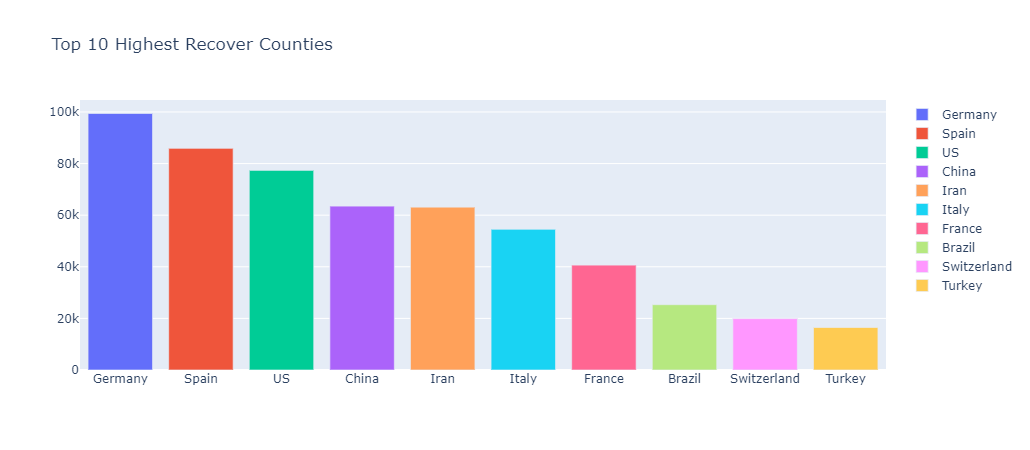

In [81]:
# printing the uniques recover contries


fig = go.Figure()

for i in range(len(topRecoverCasesCountry)):
    fig.add_traces(
        go.Bar(
            x=[topRecoverCasesCountry["Country/Region"].iloc[i]],
            y=[topRecoverCasesCountry[getLastDateOfRecoverd()].iloc[i]],
            name=topRecoverCasesCountry["Country/Region"].iloc[i],
        )
    )

#     print(f'{unique_recoveries_countries[i]}: {recover_country_cases[i]}')

fig.update_layout(title="Top 10 Highest Recover Counties")
fig.show()

In [82]:
confirmed_df = get_n_melt_data(confirmedCountryData, "Confirmed")
recovered_df = get_n_melt_data(recoveredCountryData, "Recovered")
deaths_df = get_n_melt_data(deathsCountryData, "Deaths")

In [83]:
confirmed_df_per_day = confirmed_df.groupby("Date")[["Confirmed"]].sum()
recovered_df_per_day = recovered_df.groupby("Date")[["Recovered"]].sum()
death_df_per_day = deaths_df.groupby("Date")[["Deaths"]].sum()

In [84]:
df = merge_data(confirmed_df_per_day, recovered_df_per_day, death_df_per_day)
df.to_html("index.html")

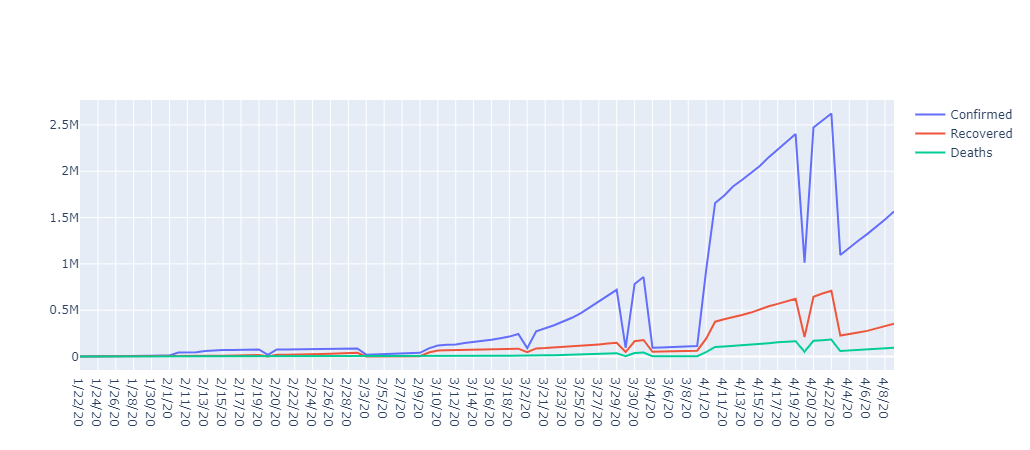

In [85]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df["Confirmed"], mode="lines", name="Confirmed"))
fig.add_trace(go.Scatter(x=df.index, y=df["Recovered"], mode="lines", name="Recovered"))
fig.add_trace(go.Scatter(x=df.index, y=df["Deaths"], mode="lines", name="Deaths"))
fig.show()

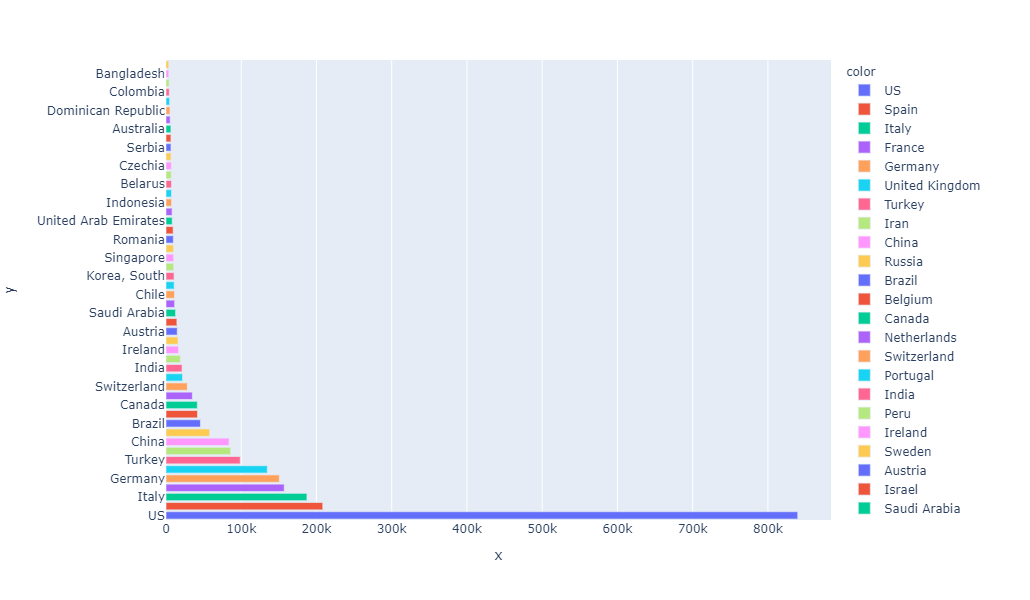

In [86]:
# Plotting Countries Date Wise On Graph

plottingConfirmData = (
    confirmedCountryData.groupby("Country/Region")[getLastDateOfConfirmed()]
    .sum()
    .sort_values(ascending=False)
    .head(50)
)

fig = px.bar(
    plottingConfirmData,
    x=plottingConfirmData.values,
    y=plottingConfirmData.index,
    hover_data=[plottingConfirmData.index, plottingConfirmData.values],
    color=plottingConfirmData.index,
    orientation="h",
    height=600,
)
fig.show()

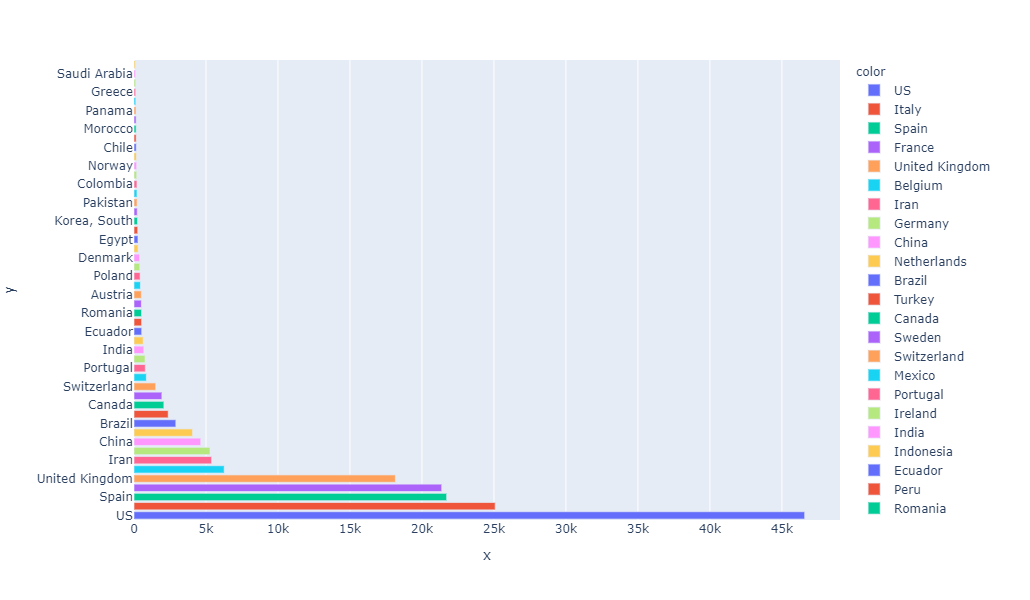

In [87]:
# Plotting Countries Date Wise On Graph

plottingDeathData = (
    deathsCountryData.groupby("Country/Region")[getLastDateOfDeaths()]
    .sum()
    .sort_values(ascending=False)
    .head(50)
)

fig = px.bar(
    plottingDeathData,
    x=plottingDeathData.values,
    y=plottingDeathData.index,
    hover_data=[plottingDeathData.index, plottingDeathData.values],
    color=plottingDeathData.index,
    orientation="h",
    height=600,
)
fig.show()

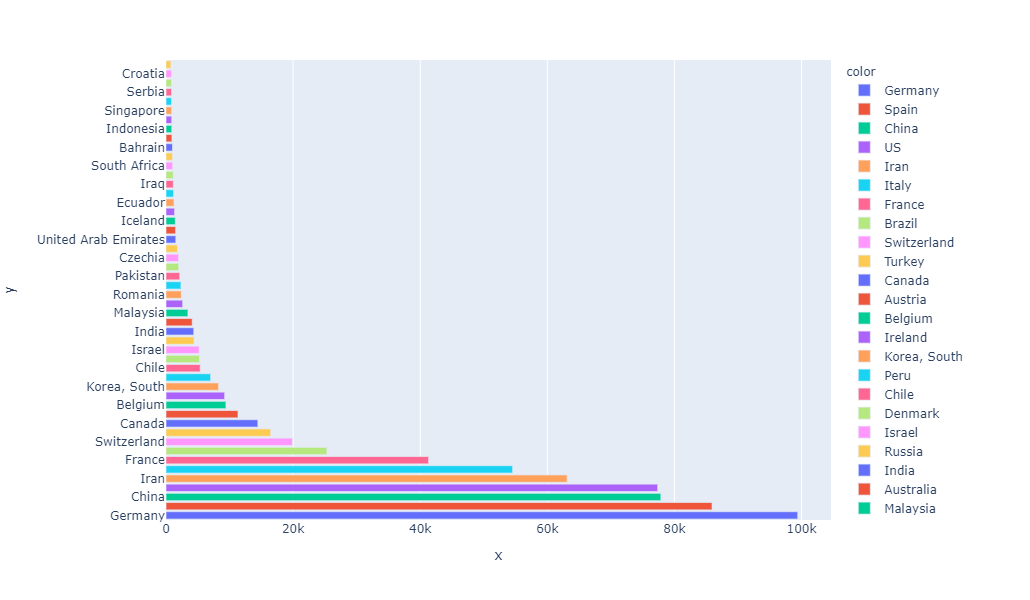

In [88]:
# Plotting Countries Date Wise On Graph

plottingRecoverData = (
    recoveredCountryData.groupby("Country/Region")[getLastDateOfRecoverd()]
    .sum()
    .sort_values(ascending=False)
    .head(50)
)

fig = px.bar(
    plottingRecoverData,
    x=plottingRecoverData.values,
    y=plottingRecoverData.index,
    hover_data=[plottingRecoverData.index, plottingRecoverData.values],
    color=plottingRecoverData.index,
    orientation="h",
    height=600,
)
fig.show()

In [89]:
# Country Wise Date gather


def countrybasedConfirmData(countryname):
    return confirmedCountryData.loc[
        confirmedCountryData["Country/Region"] == countryname
    ]


def countrybasedRecoverData(countryname):
    return recoveredCountryData.loc[
        recoveredCountryData["Country/Region"] == countryname
    ]


def countrybasedDeathData(countryname):
    return deathsCountryData.loc[deathsCountryData["Country/Region"] == countryname]

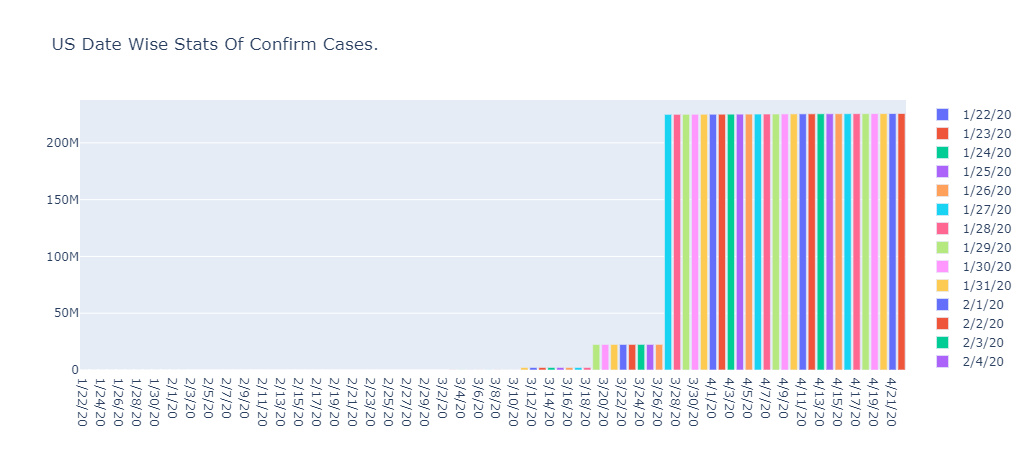

In [90]:
usdata = countrybasedConfirmData("US")
usdaterange = getDateRange(usdata)
data = usdata.loc[:, usdata.columns[4] : usdata.columns[-1]]
fig = go.Figure()

for i in range(len(usdaterange.columns)):
    fig.add_traces(
        go.Bar(
            x=[usdaterange.columns[i]],
            y=[usdata[usdaterange.columns[i]].to_string()],
            name=usdaterange.columns[i],
        )
    )

fig.update_layout(title="US Date Wise Stats Of Confirm Cases.")
fig.show()

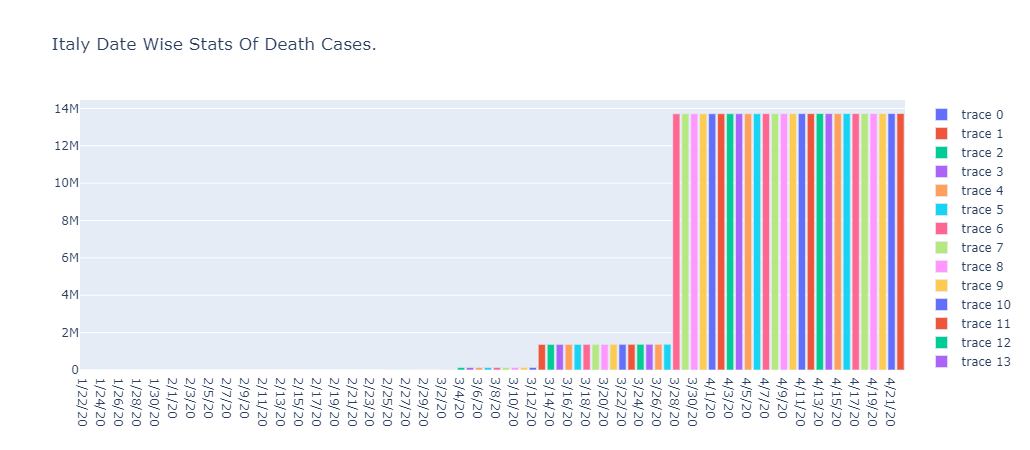

In [91]:
italydata = countrybasedDeathData("Italy")
italydaterange = getDateRange(italydata)
data = italydata.loc[:, italydata.columns[4] : italydata.columns[-1]]
fig = go.Figure()
for i in range(len(italydaterange.columns)):
    fig.add_traces(
        go.Bar(
            x=[italydaterange.columns[i]],
            y=[italydata[italydaterange.columns[i]].to_string()],
        )
    )

fig.update_layout(title="Italy Date Wise Stats Of Death Cases.")
fig.show()

In [92]:
confirm_data_as_on_1_22_20 = confirmedCountryData[
    ["Country/Region", "1/22/20"]
].sort_values(by="Country/Region")
confirm_data_as_on_lastdate = confirmedCountryData[
    ["Country/Region", getLastDateOfConfirmed()]
].sort_values(by="Country/Region")
death_data_as_on_1_22_20 = deathsCountryData[["Country/Region", "1/22/20"]].sort_values(
    by="Country/Region"
)
death_data_as_on_lastdate = deathsCountryData[
    ["Country/Region", getLastDateOfDeaths()]
].sort_values(by="Country/Region")
recover_data_as_on_1_22_20 = recoveredCountryData[
    ["Country/Region", "1/22/20"]
].sort_values(by="Country/Region")
recover_data_as_on_lastdate = recoveredCountryData[
    ["Country/Region", getLastDateOfRecoverd()]
].sort_values(by="Country/Region")

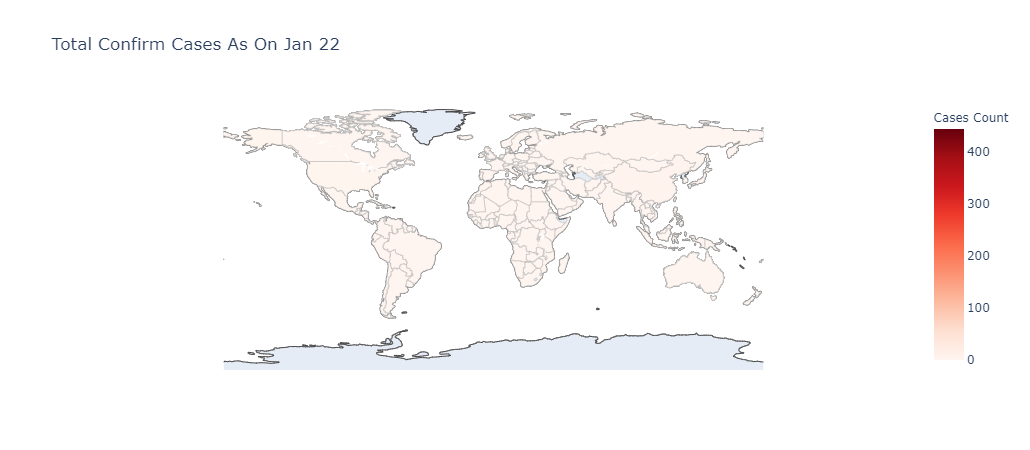

In [93]:
# plotting All confirm country cases on maps

fig = go.Figure(
    go.Choropleth(
        type="choropleth",
        locations=confirm_data_as_on_1_22_20["Country/Region"],
        locationmode="country names",
        z=confirm_data_as_on_1_22_20["1/22/20"],
        text=confirm_data_as_on_1_22_20["Country/Region"],
        colorscale="Reds",
        autocolorscale=False,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(title="Cases Count"),
    )
)

fig.update_layout(
    title="Total Confirm Cases As On Jan 22",
    geo=dict(showframe=False, showcoastlines=True,),
)

fig.show()

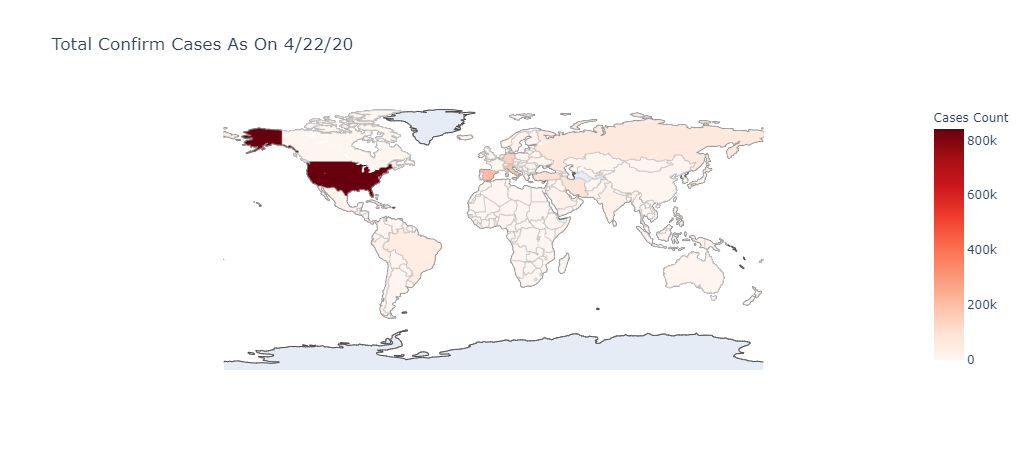

In [94]:
# plotting All confirm country cases on maps

fig = go.Figure(
    go.Choropleth(
        type="choropleth",
        locations=confirm_data_as_on_lastdate["Country/Region"],
        locationmode="country names",
        z=confirm_data_as_on_lastdate[getLastDateOfConfirmed()],
        text=confirm_data_as_on_lastdate["Country/Region"],
        colorscale="Reds",
        autocolorscale=False,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(title="Cases Count"),
    )
)

fig.update_layout(
    title="Total Confirm Cases As On " + getLastDateOfConfirmed(),
    geo=dict(showframe=False, showcoastlines=True,),
)

fig.show()

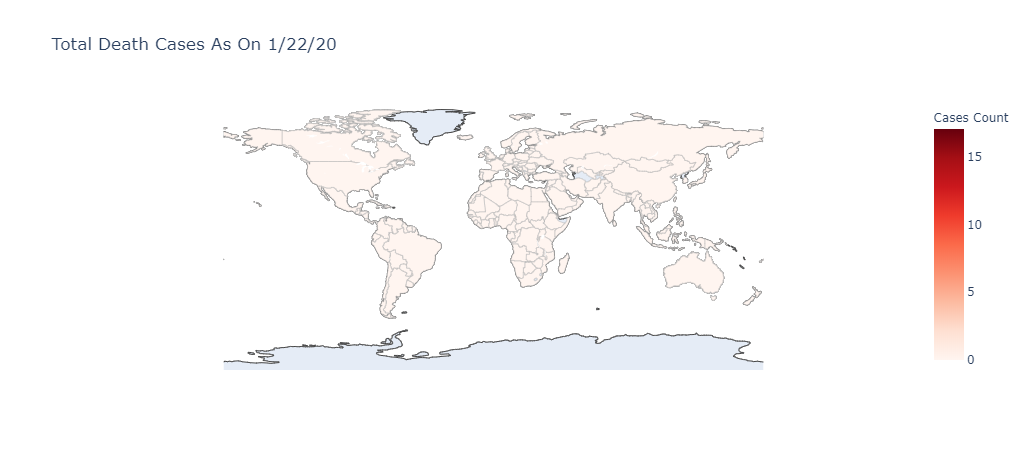

In [95]:
# plotting All death country cases on maps

fig = go.Figure(
    go.Choropleth(
        type="choropleth",
        locations=death_data_as_on_1_22_20["Country/Region"],
        locationmode="country names",
        z=death_data_as_on_1_22_20["1/22/20"],
        text=death_data_as_on_1_22_20["Country/Region"],
        colorscale="Reds",
        autocolorscale=False,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(title="Cases Count"),
    )
)

fig.update_layout(
    title="Total Death Cases As On 1/22/20",
    geo=dict(showframe=False, showcoastlines=True,),
)

fig.show()

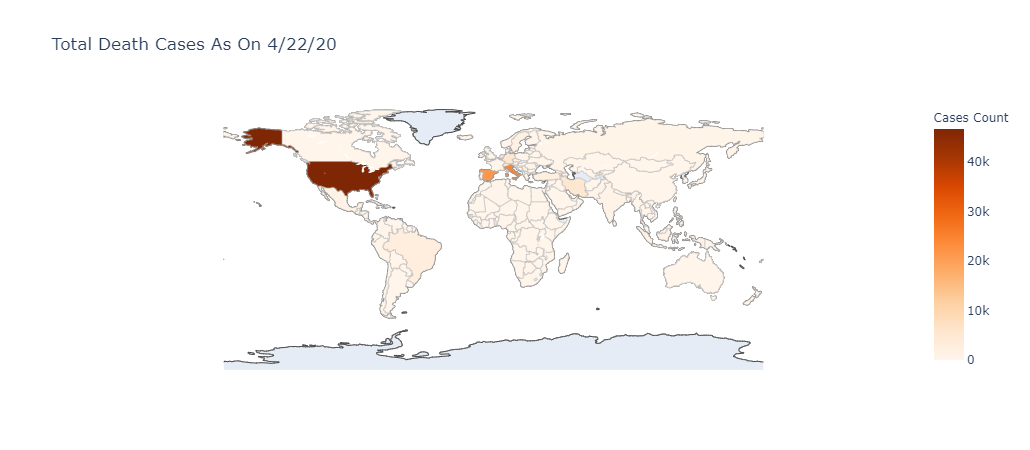

In [96]:
# plotting All death country cases on maps

fig = go.Figure(
    go.Choropleth(
        type="choropleth",
        locations=death_data_as_on_lastdate["Country/Region"],
        locationmode="country names",
        z=death_data_as_on_lastdate[getLastDateOfDeaths()],
        text=death_data_as_on_lastdate["Country/Region"],
        colorscale="oranges",
        autocolorscale=False,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(title="Cases Count"),
    )
)

fig.update_layout(
    title="Total Death Cases As On " + getLastDateOfDeaths(),
    geo=dict(showframe=False, showcoastlines=True,),
)

fig.show()

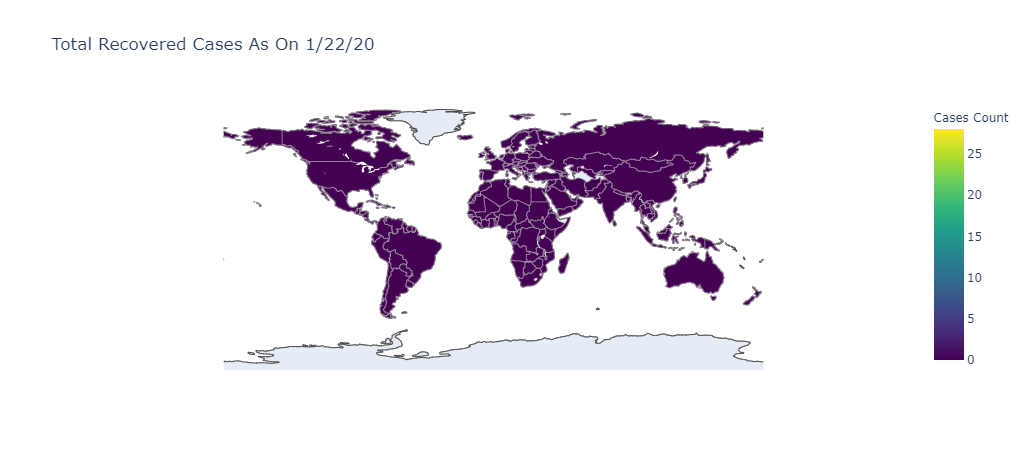

In [97]:
# plotting All death country cases on maps

fig = go.Figure(
    go.Choropleth(
        type="choropleth",
        locations=recover_data_as_on_1_22_20["Country/Region"],
        locationmode="country names",
        z=recover_data_as_on_1_22_20["1/22/20"],
        text=recover_data_as_on_1_22_20["Country/Region"],
        colorscale="viridis",
        autocolorscale=False,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(title="Cases Count"),
    )
)

fig.update_layout(
    title="Total Recovered Cases As On 1/22/20",
    geo=dict(showframe=False, showcoastlines=True,),
)

fig.show()

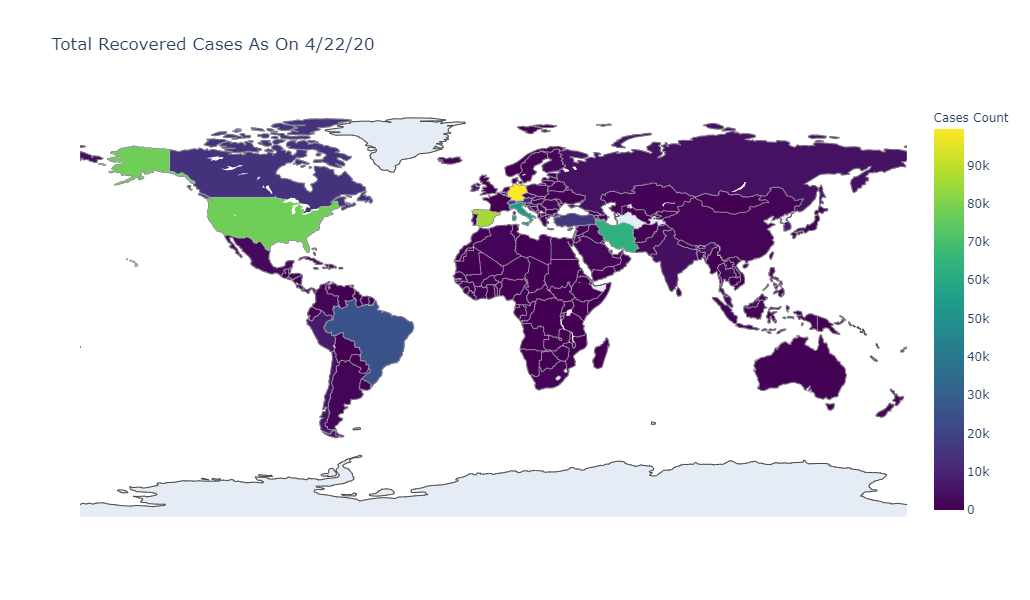

In [98]:
# plotting All death country cases on maps

fig = go.Figure(
    go.Choropleth(
        type="choropleth",
        locations=recover_data_as_on_lastdate["Country/Region"],
        locationmode="country names",
        z=recover_data_as_on_lastdate[getLastDateOfRecoverd()],
        text=recover_data_as_on_lastdate["Country/Region"],
        colorscale="viridis",
        autocolorscale=False,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(title="Cases Count"),
    )
)

fig.update_layout(
    mapbox_accesstoken=map_access_token,
    mapbox_zoom=3,
    height=600,
    title="Total Recovered Cases As On " + getLastDateOfRecoverd(),
    geo=dict(showframe=False, showcoastlines=True,),
)

fig.show()

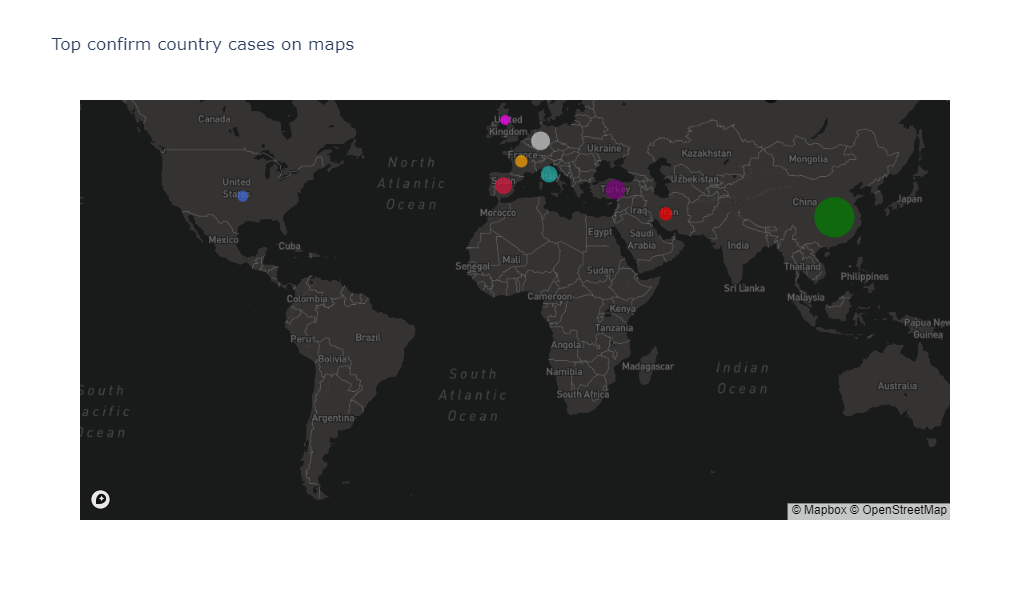

In [99]:
# plotting confirm country cases on maps


fig = go.Figure()

fig.add_trace(
    go.Scattermapbox(
        lon=topConfirmedCasesCountry["Long"],
        lat=topConfirmedCasesCountry["Lat"],
        text=topConfirmedCasesCountry["Country/Region"],
        marker=dict(
            size=topConfirmedCasesCountry.groupby("Country/Region")[
                getLastDateOfConfirmed()
            ].sum()
            / 1000,
            color=[
                "royalblue",
                "crimson",
                "lightseagreen",
                "orange",
                "lightgrey",
                "magenta",
                "purple",
                "red",
                "green",
            ],
            sizemode="area",
        ),
    )
)

fig.update_layout(
    title="Top confirm country cases on maps",
    height=600,
    mapbox=dict(
        accesstoken=map_access_token, bearing=0, pitch=0, zoom=1, style="dark",
    ),
)
fig.show()

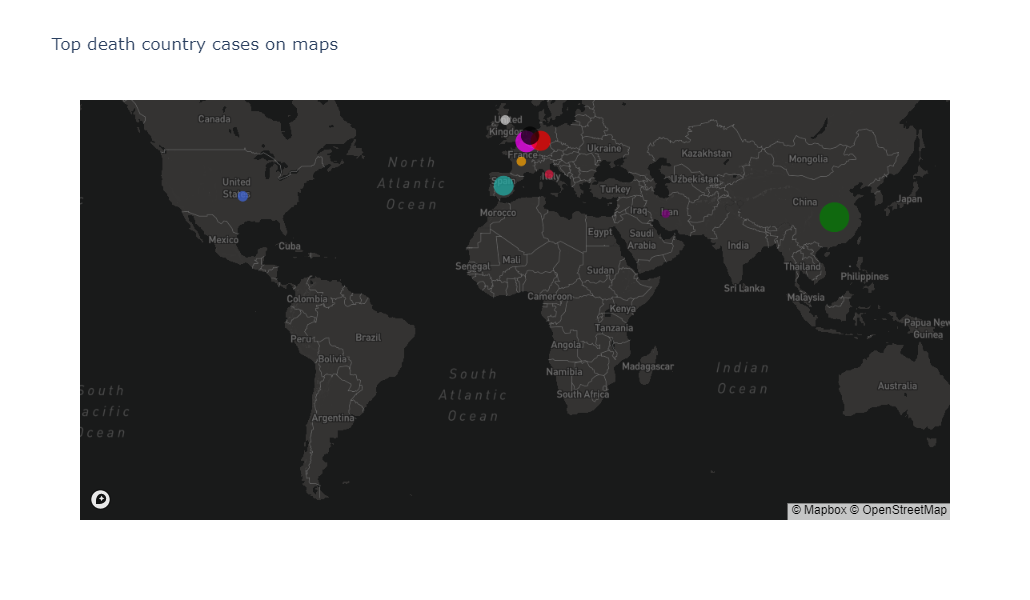

In [100]:
# plotting death country cases on maps


fig = go.Figure()

fig.add_trace(
    go.Scattermapbox(
        lon=topDeathCasesCountry["Long"],
        lat=topDeathCasesCountry["Lat"],
        text=topDeathCasesCountry[["Country/Region", getLastDateOfDeaths()]],
        marker=dict(
            size=topDeathCasesCountry.groupby("Country/Region")[
                getLastDateOfDeaths()
            ].sum()
            / 100,
            color=[
                "royalblue",
                "crimson",
                "lightseagreen",
                "orange",
                "lightgrey",
                "magenta",
                "purple",
                "red",
                "green",
            ],
            sizemode="area",
        ),
    )
)

fig.update_layout(
    title="Top death country cases on maps",
    height=600,
    mapbox=dict(
        accesstoken=map_access_token, bearing=0, pitch=0, zoom=1, style="dark",
    ),
)

fig.show()

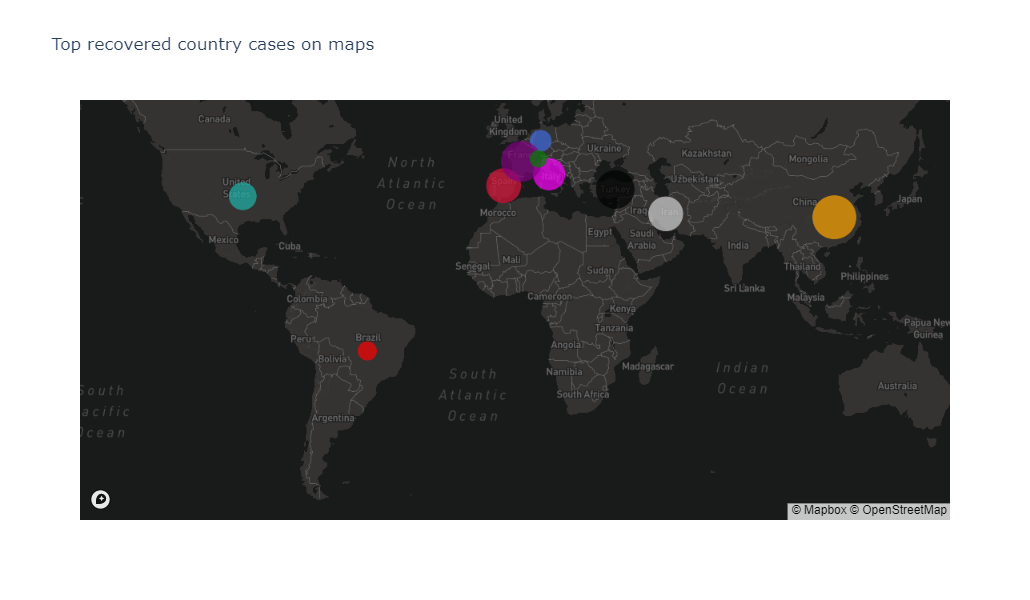

In [101]:
# plotting recover country cases on maps


fig = go.Figure()

fig.add_trace(
    go.Scattermapbox(
        lon=topRecoverCasesCountry["Long"],
        lat=topRecoverCasesCountry["Lat"],
        text=topRecoverCasesCountry["Country/Region"],
        marker=dict(
            size=topRecoverCasesCountry.groupby("Country/Region")[
                getLastDateOfRecoverd()
            ].sum()
            / 100,
            color=[
                "royalblue",
                "crimson",
                "lightseagreen",
                "orange",
                "lightgrey",
                "magenta",
                "purple",
                "red",
                "green",
            ],
            sizemode="area",
        ),
    )
)

fig.update_layout(
    title="Top recovered country cases on maps",
    height=600,
    mapbox=dict(
        accesstoken=map_access_token, bearing=0, pitch=0, zoom=1, style="dark",
    ),
)

fig.show()

In [120]:
# Plotting India Dataset On Graphs
# First Plotting the confirm case of india statewise


def getTopStateWithConfirmCase():
    return (
        indiadata.groupby("States")["Confirmed"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )


def getTopStateWithDeathCase():
    return (
        indiadata.groupby("States")["Deaths"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )


def getTopStateWithRecoverCase():
    return (
        indiadata.groupby("States")["Recovered"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )

In [121]:
# getting the values and storing it to variable

topStatesWithHighestConfirmCasesIndia = getTopStateWithConfirmCase()
topStatesWithHighestDeathCasesIndia = getTopStateWithDeathCase()
topStatesWithHighestRecoverCasesIndia = getTopStateWithRecoverCase()

In [133]:
indiadata

,SN,States,Active,Confirmed,Deaths,Recovered,Date,Lat,Lon,total_active,Mortality
0,0,Maharashtra,4591,5649,269,789,2020-04-22T20:17:37+00:00,19.7515,75.7139,4591,4.761905
1,1,Delhi,1476,2248,48,724,2020-04-22T20:47:38+00:00,28.7041,77.1025,1476,2.135231
2,2,Gujarat,2125,2407,103,179,2020-04-22T20:32:37+00:00,22.2587,71.1924,2125,4.279186
3,3,Rajasthan,1517,1888,27,344,2020-04-22T22:27:37+00:00,27.0238,74.2179,1517,1.430085
4,4,Tamil Nadu,949,1629,18,662,2020-04-22T18:17:40+00:00,11.1271,78.6569,949,1.104972
5,5,Madhya Pradesh,1355,1587,80,152,2020-04-21T17:57:38+00:00,22.9734,78.6569,1355,5.040958
6,6,Uttar Pradesh,1255,1449,21,173,2020-04-22T20:57:38+00:00,26.8467,80.9462,1255,1.449275
7,7,Telangana,725,943,24,194,2020-04-21T20:17:41+00:00,NaN,NaN,725,2.545069
8,8,Andhra Pradesh,669,813,24,120,2020-04-22T12:22:37+00:00,15.9129,79.7400,669,2.952030
9,9,Karnataka,279,427,17,131,2020-04-22T19:17:37+00:00,15.3173,75.7139,279,3.981265


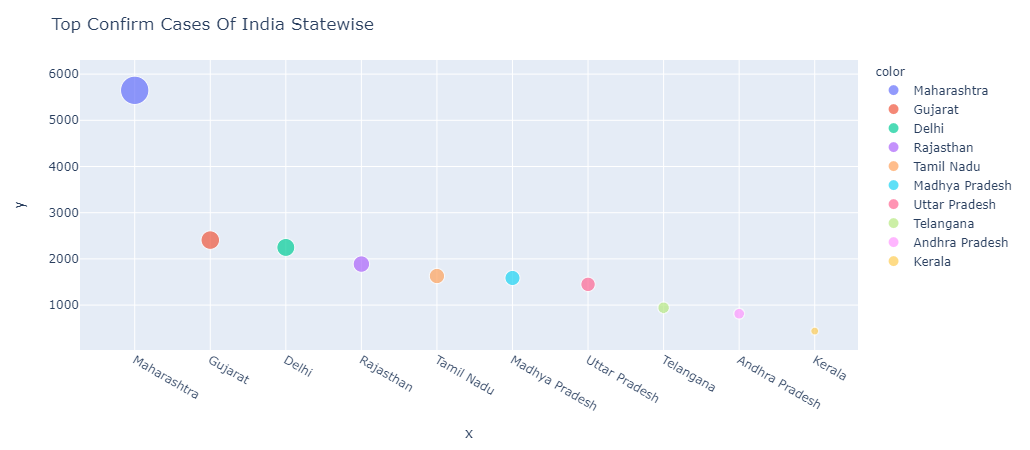

In [122]:
# showing the scatter graph of Highest Confirm Cases

fig = px.scatter(
    topStatesWithHighestConfirmCasesIndia,
    x=topStatesWithHighestConfirmCasesIndia.index,
    y=topStatesWithHighestConfirmCasesIndia.values,
    color=topStatesWithHighestConfirmCasesIndia.index,
    size=topStatesWithHighestConfirmCasesIndia.values / 100,
)
fig.update_layout(title="Top Confirm Cases Of India Statewise")
fig.show()

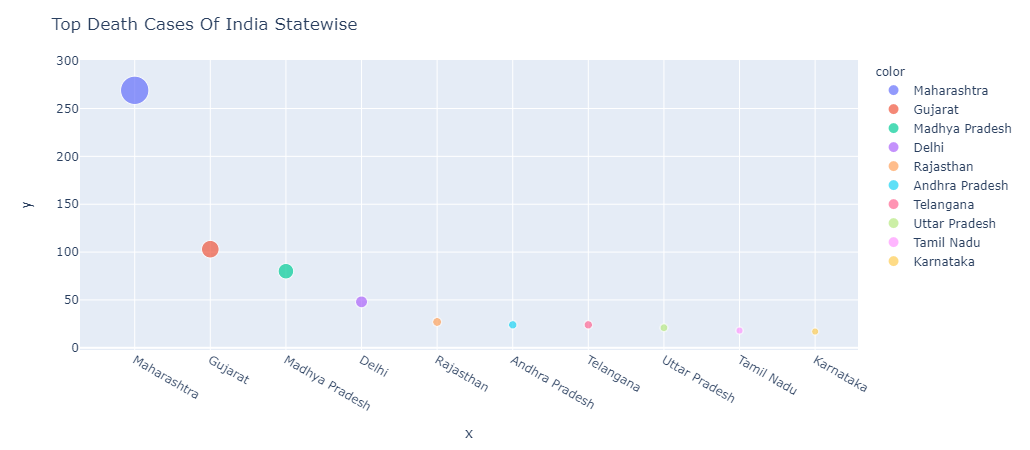

In [123]:
# Showing the Highest Cases Of Deaths

fig = px.scatter(
    topStatesWithHighestDeathCasesIndia,
    x=topStatesWithHighestDeathCasesIndia.index,
    y=topStatesWithHighestDeathCasesIndia.values,
    color=topStatesWithHighestDeathCasesIndia.index,
    size=topStatesWithHighestDeathCasesIndia.values / 100,
)
fig.update_layout(title="Top Death Cases Of India Statewise")
fig.show()

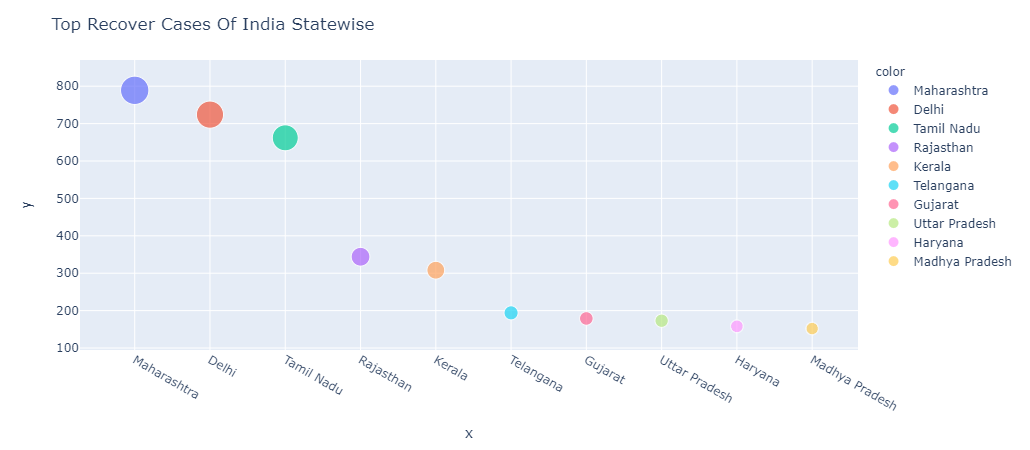

In [124]:
# Showing the Highest Cases Of Recoveries

fig = px.scatter(
    topStatesWithHighestRecoverCasesIndia,
    x=topStatesWithHighestRecoverCasesIndia.index,
    y=topStatesWithHighestRecoverCasesIndia.values,
    color=topStatesWithHighestRecoverCasesIndia.index,
    size=topStatesWithHighestRecoverCasesIndia.values / 100,
)
fig.update_layout(title="Top Recover Cases Of India Statewise")
fig.show()

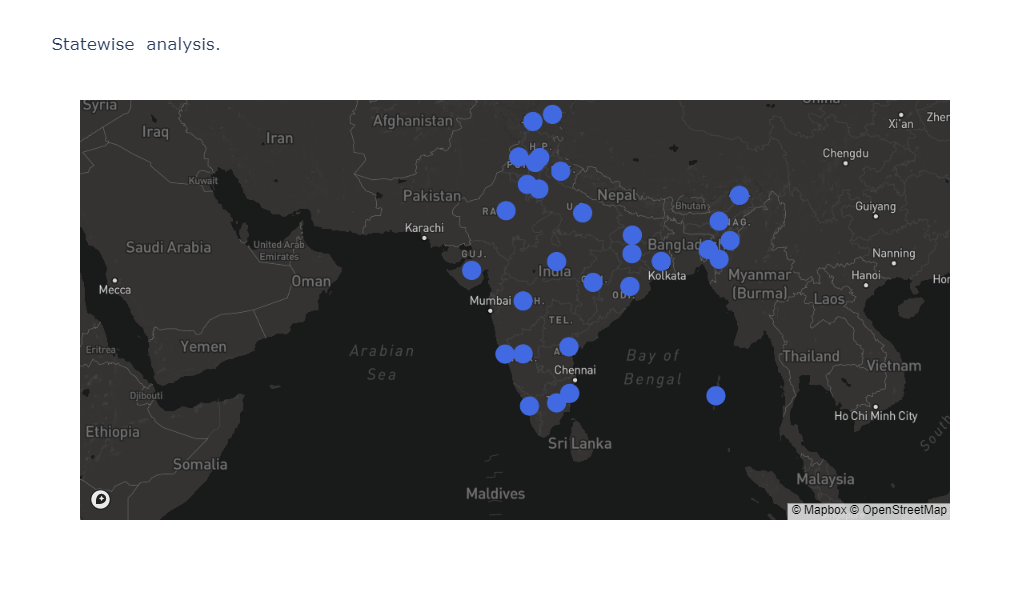

In [125]:
# Plotting States on map with data


fig = go.Figure(
    go.Scattermapbox(
        lon=indiadata["Lon"],
        lat=indiadata["Lat"],
        hovertext=indiadata[["States", "Confirmed", "Deaths", "Recovered"]],
        mode="markers",
        marker=dict(color="royalblue", size=20,),
    )
)

fig.update_layout(
    title="Statewise  analysis.",
    hovermode="x unified",
    mapbox=dict(
        accesstoken=map_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(lat=19, lon=75),
        pitch=0,
        zoom=3,
        style="dark",
    ),
    height=600,
)

In [126]:
# Getting the Active Cases Of India Data
total_active = []

for i in range(len(indiadata)):
    total_active.append(
        indiadata["Confirmed"][i] - (indiadata["Deaths"][i] + indiadata["Recovered"][i])
    )

indiadata["total_active"] = total_active

In [127]:
indiadata.describe()

,SN,Active,Confirmed,Deaths,Recovered,Lat,Lon,total_active
count,37.000000,37.000000,37.000000,37.000000,37.000000,30.000000,30.000000,37.000000
mean,18.000000,441.054054,577.567568,18.405405,118.108108,23.334890,81.532700,441.054054
std,10.824355,890.252241,1101.814628,47.902946,202.975338,6.830224,6.962936,890.252241
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.850500,71.192400,0.000000
25%,9.000000,1.000000,7.000000,0.000000,2.000000,20.051550,76.347375,1.000000
50%,18.000000,23.000000,46.000000,1.000000,23.000000,23.775500,78.838100,23.000000
75%,27.000000,335.000000,437.000000,17.000000,152.000000,28.582575,85.304800,335.000000
max,36.000000,4591.000000,5649.000000,269.000000,789.000000,34.299600,94.727800,4591.000000


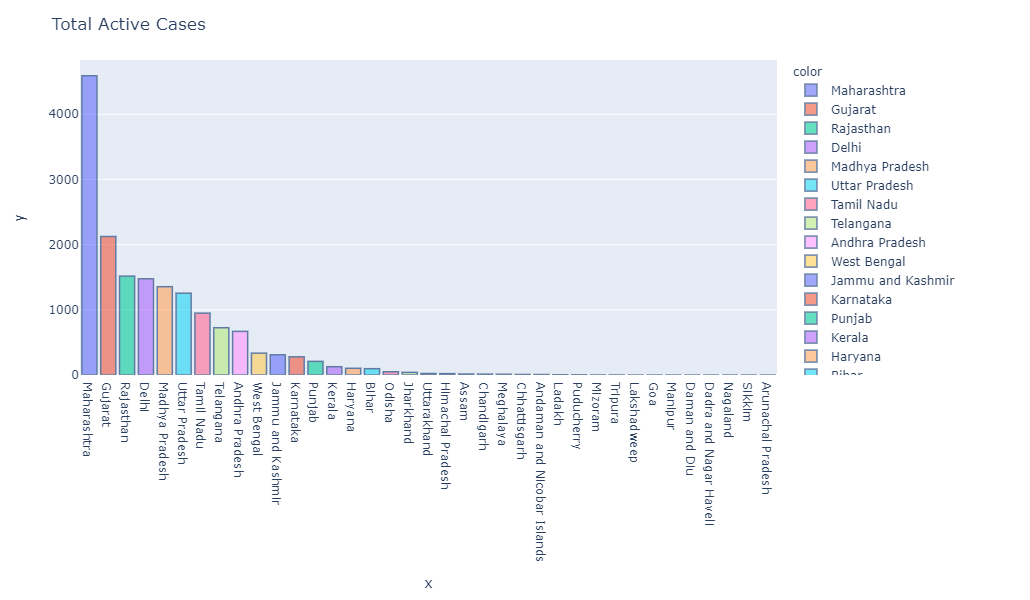

In [129]:
totalActiveCasesIndia = (
    indiadata.groupby("States")["total_active"].sum().sort_values(ascending=False)
)

fig = px.bar(
    totalActiveCasesIndia,
    x=totalActiveCasesIndia.index,
    y=totalActiveCasesIndia.values,
    color=totalActiveCasesIndia.index,
    height=600,
)
fig.update_traces(
    marker_line_color="rgb(8,48,107)", marker_line_width=1.5, opacity=0.6,
)
fig.update_layout(title_text="Total Active Cases ")
fig.show()

In [130]:
# Date Wise India Confirm Cases

date = indiadata["Date"]

In [131]:
# Mortality Rate in india

indiadata["Mortality"] = (indiadata["Deaths"] / indiadata["Confirmed"]) * 100

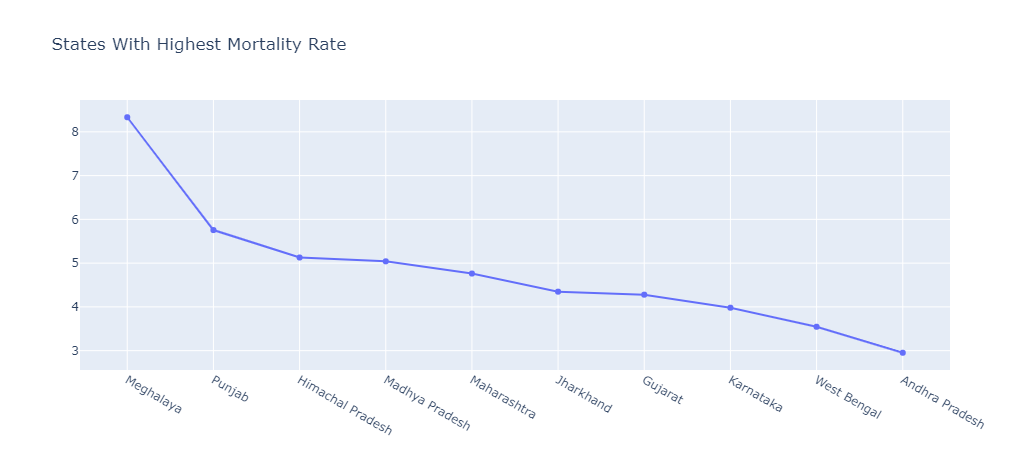

In [132]:
# Plotting the mortality rate of each country
# the proportion of people who die from a specified disease among all individuals diagnosed with the disease over a certain period of time.
StateWithHighMortalityRate = (
    indiadata[["States", "Mortality"]]
    .sort_values(by="Mortality", ascending=False)
    .head(10)
)


fig = go.Figure(
    data=go.Scatter(
        x=StateWithHighMortalityRate["States"],
        y=StateWithHighMortalityRate["Mortality"],
    )
)

fig.update_layout(title="States With Highest Mortality Rate")
fig.show()